In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)


from google.colab import drive
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/IA2_PROYECTOFINAL/binarios'
%cd '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/binarios'

2.11.0
Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/binarios'
/content


In [ ]:
X_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_train.npy")
X_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_test.npy")
Y_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_train.npy")
Y_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_test.npy")
print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

(20710, 32, 32, 3) (8876, 32, 32, 3) (20710, 2) (8876, 2)


In [ ]:
#@title **code** pay attention on the computational complexity
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(2, activation='softmax'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [ ]:
#@title **code** same notation to compile model

learning_rate= 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/50
324/324 [==============================] - 91s 279ms/step - loss: 0.2685 - accuracy: 0.9083 - val_loss: 0.2564 - val_accuracy: 0.9060
Epoch 2/50
324/324 [==============================] - 96s 297ms/step - loss: 0.2269 - accuracy: 0.9130 - val_loss: 0.2384 - val_accuracy: 0.9065
Epoch 3/50
324/324 [==============================] - 87s 270ms/step - loss: 0.2094 - accuracy: 0.9173 - val_loss: 0.2286 - val_accuracy: 0.9117
Epoch 4/50
324/324 [==============================] - 79s 244ms/step - loss: 0.1928 - accuracy: 0.9223 - val_loss: 0.2578 - val_accuracy: 0.9085
Epoch 5/50
324/324 [==============================] - 78s 240ms/step - loss: 0.1768 - accuracy: 0.9309 - val_loss: 0.2344 - val_accuracy: 0.9096
Epoch 6/50
324/324 [==============================] - 77s 239ms/step - loss: 0.1536 - accuracy: 0.9391 - val_loss: 0.2415 - val_accuracy: 0.9139
Epoch 7/50
324/324 [==============================] - 78s 241ms/step - loss: 0.1280 - accuracy: 0.9503 - val_loss: 0.2569 - val_ac

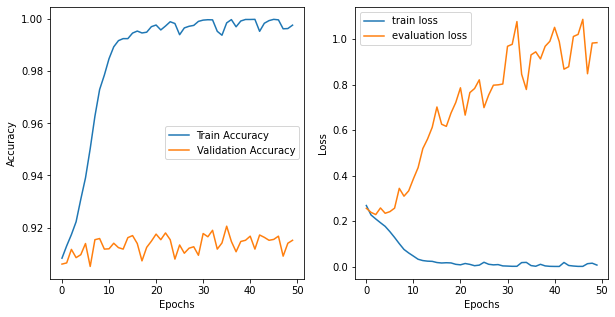

In [ ]:
import matplotlib.pyplot as plt
history = model_CNN.fit(X_train, Y_train, epochs=50,verbose=1, batch_size=64,validation_data=(X_test, Y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(32, 32,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

ERROR:root:File `'code/dl_plot.py'` not found.


/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios
278/278 [==============================] - 9s 33ms/step
valor predicho: 1  clase:  SR
max prob:  0.99999994 ground truth:  SR
(8876, 2)


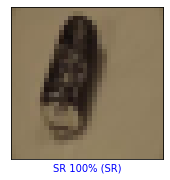

In [ ]:
#@title **code:**  Evaluate results
%cd '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios'

import matplotlib.pyplot as plt
class_names = ['NR','SR']
%run code/dl_plot.py
index_vector =  18#@param {type:"integer"}

predictionss = model_CNN.predict(X_test)
print ("valor predicho:",  np.argmax(predictionss[index_vector]), " clase: ", class_names[np.argmax(predictionss[index_vector])])
print ("max prob: ", np.max(predictionss[index_vector]), "ground truth: ", class_names[np.argmax(Y_test ,axis=1)[index_vector]])

print(predictionss.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictionss, np.argmax(Y_test ,axis=1), X_test)
#plt.subplot(1,2,2)
#plot_value_array(index_vector, predictions,  np.argmax(Y_test ,axis=1))




In [ ]:
type(X_test)

numpy.ndarray

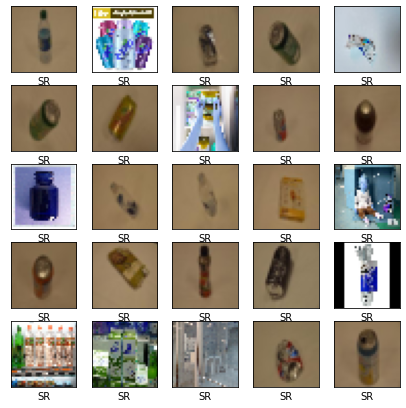

In [ ]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(32,32,3), cmap=plt.cm.binary)

    plt.xlabel(class_names[int(Y_test[i,1])])

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history1.history['accuracy'], label='Train Accuracy');
ax.plot(history1.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history1.history['loss'], label='train loss');
ax.plot(history1.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
